# Data Cleaning

In [1]:
import pandas as pd
import pre_processing as pp
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')

/Users/LokiJo/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


## Articles

In [2]:
#First download the zip file from kaggle and unzip it (name of the folder is archive)

files = ['archive/ArticlesApril2018.csv', 'archive/ArticlesFeb2018.csv', 
         'archive/ArticlesJan2018.csv', 'archive/ArticlesMarch2018.csv']

columns = ['articleID', 'articleWordCount', 'headline',
           'keywords', 'newDesk', 'snippet', 'typeOfMaterial']

def open_files(files, cols=None):
    '''
    Takes a list of file names and columns (optional) 
    and returns a pandas dataframe
    '''
    
    articles = []
    for filename in files:
        article = pd.read_csv(filename, usecols=cols)
        articles.append(article)
        
    return pd.concat(articles)
        
articles = open_files(files, columns)
articles.drop_duplicates(subset='articleID', inplace=True)
print(articles.shape)
articles.head()

(4769, 7)


,articleID,articleWordCount,headline,keywords,newDesk,snippet,typeOfMaterial
0,5adf6684068401528a2aa69b,781,Former N.F.L. Cheerleaders’ Settlement Offer: ...,"['Workplace Hazards and Violations', 'Football...",Sports,"“I understand that they could meet with us, pa...",News
1,5adf653f068401528a2aa697,656,E.P.A. to Unveil a New Rule. Its Effect: Less ...,"['Environmental Protection Agency', 'Pruitt, S...",Climate,The agency plans to publish a new regulation T...,News
2,5adf4626068401528a2aa628,2427,"The New Noma, Explained","['Restaurants', 'Noma (Copenhagen, Restaurant)...",Dining,What’s it like to eat at the second incarnatio...,News
3,5adf40d2068401528a2aa619,626,Unknown,"['Macron, Emmanuel (1977- )', 'Trump, Donald J...",Washington,President Trump welcomed President Emmanuel Ma...,News
4,5adf3d64068401528a2aa60f,815,Unknown,"['Toronto, Ontario, Attack (April, 2018)', 'Mu...",Foreign,"Alek Minassian, 25, a resident of Toronto’s Ri...",News


In [3]:
articles.groupby(by='typeOfMaterial').size()

typeOfMaterial
An Appraisal          1
Biography             2
Blog                 11
Brief                 1
Editorial           103
Interview             1
Letter                3
News               3408
News Analysis        31
Obituary (Obit)      18
Op-Ed               768
Question              7
Review              224
briefing            191
dtype: int64

In [4]:
articles['snippet'] = articles['snippet'].apply(pp.clean_text)

articles.head()

,articleID,articleWordCount,headline,keywords,newDesk,snippet,typeOfMaterial
0,5adf6684068401528a2aa69b,781,Former N.F.L. Cheerleaders’ Settlement Offer: ...,"['Workplace Hazards and Violations', 'Football...",Sports,i understand that they could meet with us pat...,News
1,5adf653f068401528a2aa697,656,E.P.A. to Unveil a New Rule. Its Effect: Less ...,"['Environmental Protection Agency', 'Pruitt, S...",Climate,the agency plans to publish a new regulation t...,News
2,5adf4626068401528a2aa628,2427,"The New Noma, Explained","['Restaurants', 'Noma (Copenhagen, Restaurant)...",Dining,whats it like to eat at the second incarnation...,News
3,5adf40d2068401528a2aa619,626,Unknown,"['Macron, Emmanuel (1977- )', 'Trump, Donald J...",Washington,president trump welcomed president emmanuel ma...,News
4,5adf3d64068401528a2aa60f,815,Unknown,"['Toronto, Ontario, Attack (April, 2018)', 'Mu...",Foreign,alek minassian a resident of torontos richm...,News


In [5]:
articles.to_csv('data/articles.csv', index=False)

## Comments

In [6]:
files = ['archive/CommentsApril2018.csv', 'archive/CommentsFeb2018.csv', 
         'archive/CommentsJan2018.csv', 'archive/CommentsMarch2018.csv']
columns = ['articleID', 'articleWordCount', 'commentID', 'commentBody','depth']
comments = open_files(files, columns)
comments.drop_duplicates(subset='commentID', inplace=True)
print(comments.shape)
comments.head()

(917736, 5)


,articleID,articleWordCount,commentBody,commentID,depth
0,5adf6684068401528a2aa69b,781.0,How could the league possibly refuse this offe...,26853969.0,1.0
1,5adf6684068401528a2aa69b,781.0,"So then the execs can be like ""yeah...we will ...",26853699.0,1.0
2,5adf6684068401528a2aa69b,781.0,I would not want to play chess against these c...,26853677.0,1.0
3,5adf6684068401528a2aa69b,781.0,Could the cheerleaders join the Actors' Equity...,26853784.0,1.0
4,5adf653f068401528a2aa697,656.0,Seeking conclusions which support preconceived...,26854236.0,1.0


In [7]:
comments['commentBody'] = comments['commentBody'].apply(pp.clean_text)

comments.head()

,articleID,articleWordCount,commentBody,commentID,depth
0,5adf6684068401528a2aa69b,781.0,how could the league possibly refuse this offer,26853969.0,1.0
1,5adf6684068401528a2aa69b,781.0,so then the execs can be like yeah we will ...,26853699.0,1.0
2,5adf6684068401528a2aa69b,781.0,i would not want to play chess against these c...,26853677.0,1.0
3,5adf6684068401528a2aa69b,781.0,could the cheerleaders join the actors equity...,26853784.0,1.0
4,5adf653f068401528a2aa697,656.0,seeking conclusions which support preconceived...,26854236.0,1.0


In [8]:
comments.to_csv('data/article_comments.csv', index=False)

## Word Clouds

In [9]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings 
warnings.filterwarnings('ignore')

In [10]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=60, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)
    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size,
                    #collocations=False,
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    #print(wordcloud.words_)
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

#WordCloud().process_text(comments_text)
d = './images/masks-wordclouds/'

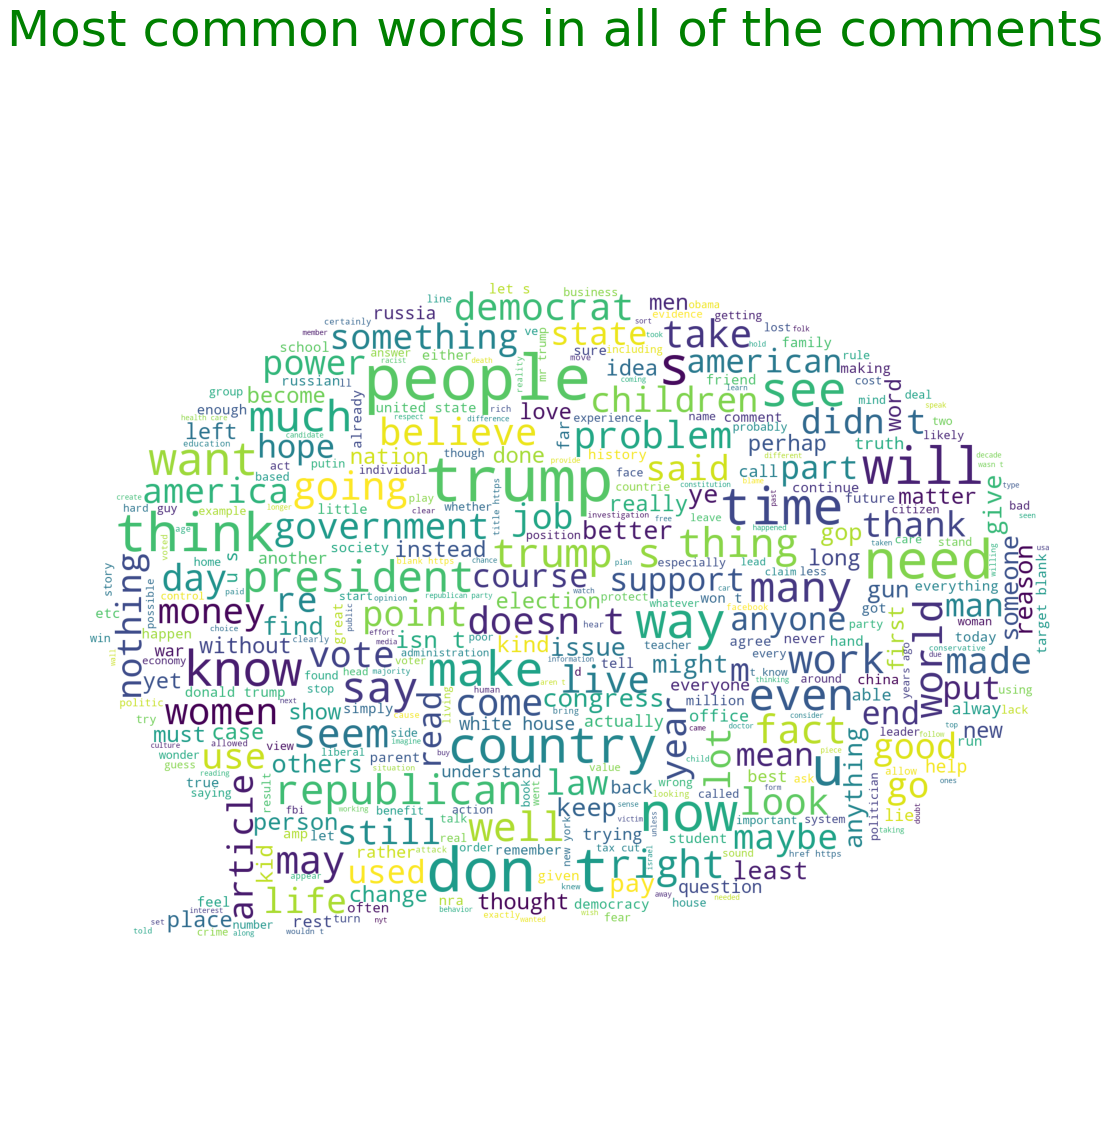

In [11]:
comments_text = ' '.join(comments.commentBody.tolist())
comments_mask = np.array(Image.open(d + 'comment.png'))
plot_wordcloud(comments_text, comments_mask, max_words=400, max_font_size=120, 
               title = 'Most common words in all of the comments', title_size=50)

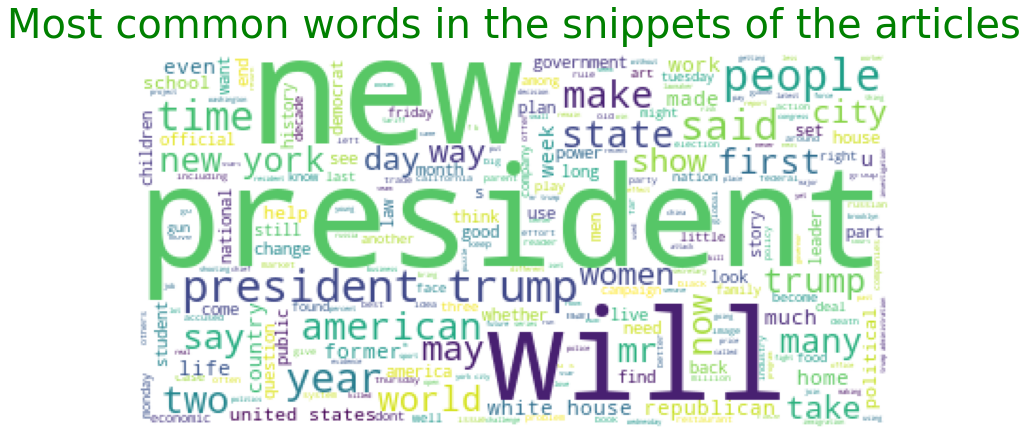

In [12]:
snippet_text = ' '.join(articles.snippet.tolist())
plot_wordcloud(snippet_text, max_words=800, max_font_size=80, figure_size=(14,10),
               title = 'Most common words in the snippets of the articles')